In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path_pears = "pears.jpg"
path_coins = "coins.jpg"
path_landscape = "landscape.jpg"

In [3]:
image3 = cv2.imread(path_landscape)
image3_gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

In [4]:
image3_gray.shape

(1280, 1920)

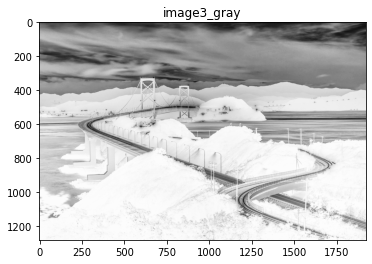

In [5]:
plt.imshow(image3_gray, cmap="Greys")
plt.title("image3_gray")
plt.show()

In [6]:
kernel_blurring = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])/9

In [7]:
image3_blurred = cv2.filter2D(image3_gray, -1, kernel_blurring)

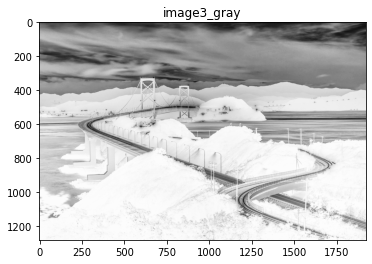

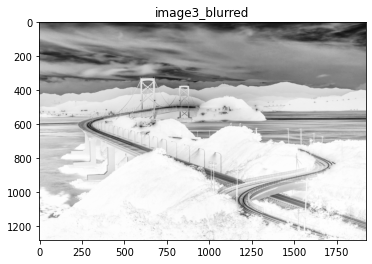

In [8]:
plt.imshow(image3_gray, cmap="Greys")
plt.title("image3_gray")
plt.show()
plt.imshow(image3_blurred, cmap="Greys")
plt.title("image3_blurred")
plt.show()

In [9]:
kernel_edge = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

In [10]:
image_edges = cv2.filter2D(image3_gray,-1,kernel_edge)

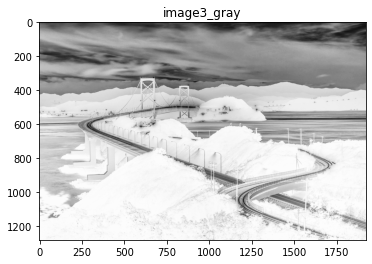

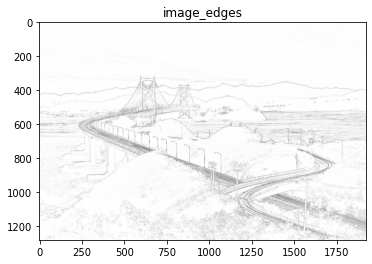

In [11]:
plt.imshow(image3_gray, cmap="Greys")
plt.title("image3_gray")
plt.show()
plt.imshow(image_edges, cmap="Greys")
plt.title("image_edges")
plt.show()

In [12]:
image3_gray.dtype

dtype('uint8')

In [13]:
np.max(image3_gray)


255

In [14]:
x_kernel = np.array([[-1,0,1]])

In [15]:
y_kernel = np.array([
    [-1],
    [0],
    [1]
])

In [16]:
y_gradients = cv2.filter2D(image3_gray,-1,y_kernel)
y_gradients.dtype

dtype('uint8')

In [17]:
np.max(y_gradients)


253

In [18]:
x_gradients = cv2.filter2D(image3_gray,-1,x_kernel)
gradients = np.sqrt(y_gradients**2 + x_gradients**2).astype(np.uint8)

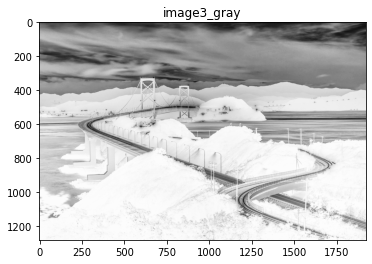

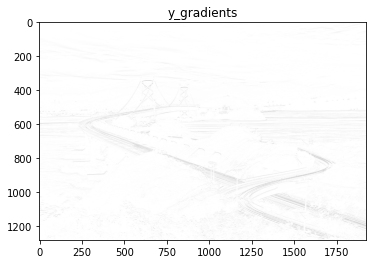

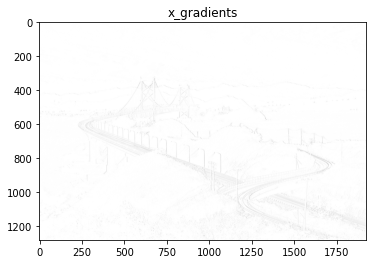

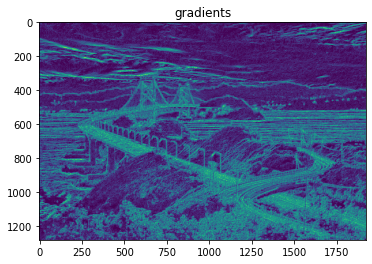

In [19]:
plt.imshow(image3_gray, cmap="Greys")
plt.title("image3_gray")
plt.show()
plt.imshow(y_gradients, cmap="Greys")
plt.title("y_gradients")
plt.show()
plt.imshow(x_gradients, cmap="Greys")
plt.title("x_gradients")
plt.show()
plt.imshow(gradients)
plt.title("gradients")
plt.show()

In [20]:
image3_gray_float = image3_gray.astype(np.float32)
image3_gray_float.dtype

dtype('float32')

In [21]:
np.max(image3_gray_float)


255.0

In [22]:
x_kernel = np.array([[-1,0,1]]).astype(np.float32)
y_kernel = np.array([
    [-1],
    [0],
    [1]
])

y_gradients = cv2.filter2D(image3_gray_float,-1,y_kernel)

In [23]:
image3_gray_float.dtype

dtype('float32')

In [24]:
np.max(image3_gray_float)

255.0

In [25]:
np.min(image3_gray_float)

0.0

In [26]:
x_gradients = cv2.filter2D(image3_gray_float,-1,x_kernel)
gradients = np.sqrt(y_gradients**2 + x_gradients**2)

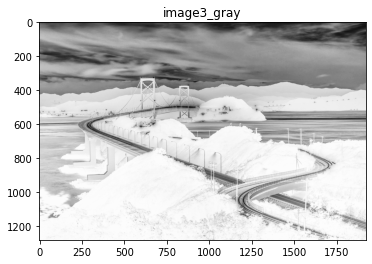

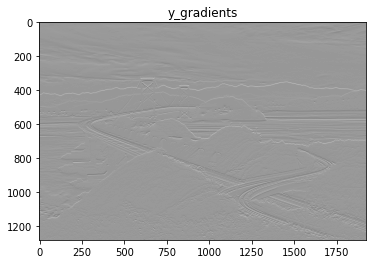

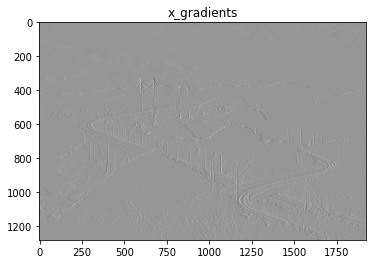

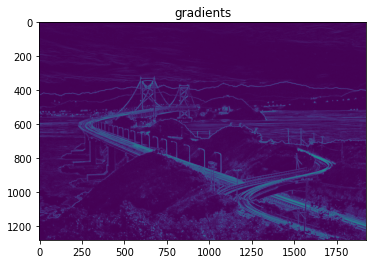

In [27]:
plt.imshow(image3_gray, cmap="Greys")
plt.title("image3_gray")
plt.show()
plt.imshow(y_gradients, cmap="Greys")
plt.title("y_gradients")
plt.show()
plt.imshow(x_gradients, cmap="Greys")
plt.title("x_gradients")
plt.show()
plt.imshow(gradients)
plt.title("gradients")
plt.show()

## These are simple implementations, and usually we use some more complex methods,
let's look in to one better implementation of edge finding

The process of Canny edge detection algorithm can be broken down to five different steps:

Apply Gaussian filter to smooth the image in order to remove the noise
Find the intensity gradients of the image
Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
Apply double threshold to determine potential edges
Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

First let's make a simplified version of this, with tools that we learned to use.
-- apply blurring filter that we made
-- apply gradient calculation that we made
-- thresholding that we used last time

In [28]:
kernel_blurring = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])/9

In [29]:
image3_blurred = cv2.filter2D(image3_gray, -1, kernel_blurring)

In [30]:
x_kernel = np.array([[-1,0,1]])

In [31]:
y_kernel = np.array([
    [-1],
    [0],
    [1]
])

In [32]:
y_gradients = cv2.filter2D(image3_gray,-1,y_kernel)

In [33]:
x_gradients = cv2.filter2D(image3_gray,-1,x_kernel)
gradients = np.sqrt(y_gradients**2 + x_gradients**2)

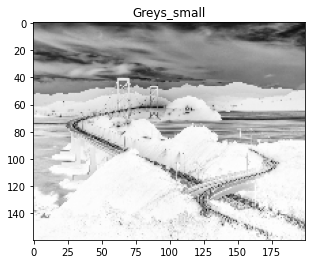

In [35]:
image_small = cv2.resize(image3_gray, (200,160))
plt.imshow(image_small, cmap="Greys")
plt.title("Greys_small")
plt.show()

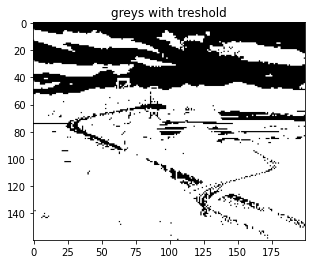

In [37]:
_,image_small_with_threshold = cv2.threshold(image_small, 127,255,cv2.THRESH_BINARY)
plt.imshow(image_small_with_threshold, cmap="Greys")
plt.title("greys with treshold")
plt.show()

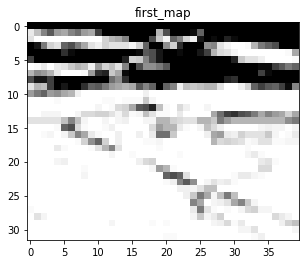

In [38]:
first_map = np.zeros((32,40))
for i in range(first_map.shape[0]):
    for u in range(first_map.shape[1]):
        first_map[i][u] = np.mean(image_small_with_threshold[i*5:(i+1)*5,u*5:(u+1)*5])
plt.imshow(first_map, cmap="Greys")
plt.title("first_map")
plt.show()

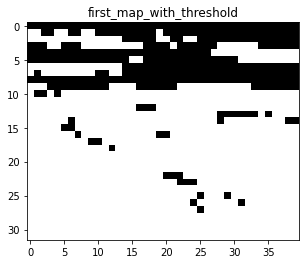

In [39]:
_,first_map_with_threshold = cv2.threshold(first_map, 127,255,cv2.THRESH_BINARY)
plt.imshow(first_map_with_threshold, cmap="Greys")
plt.title("first_map_with_threshold")
plt.show()

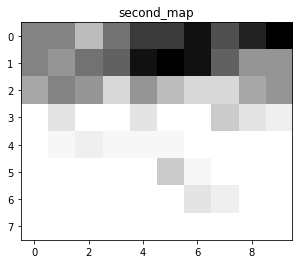

In [40]:
second_map = np.zeros((8,10))
for i in range(second_map.shape[0]):
    for u in range(second_map.shape[1]):
        second_map[i][u] = np.mean(first_map_with_threshold[i*4:(i+1)*4,u*4:(u+1)*4])

plt.imshow(second_map, cmap="Greys")
plt.title("second_map")
plt.show()

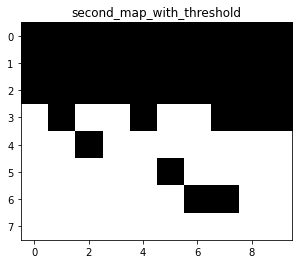

In [41]:
_,second_map_with_threshold = cv2.threshold(second_map, 20, 255,cv2.THRESH_BINARY)
plt.imshow(second_map_with_threshold, cmap="Greys")
plt.title("second_map_with_threshold")
plt.show()

In [ ]:
# plt.imshow(image3_gray, cmap="Greys")
plt.title("image3_gray")
plt.show()
'''
plt.imshow(y_gradients, cmap="Greys")
plt.title("y_gradients")
plt.show()
plt.imshow(x_gradients, cmap="Greys")
plt.title("x_gradients")
plt.show()
plt.imshow(gradients)
plt.title("gradients")
plt.show()
'''